In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-06-21 09:29:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   149MB/s    in 0.4s    

2022-06-21 09:29:17 (149 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile
l='./cats_and_dogs_filtered.zip'
z=zipfile.ZipFile(l,'r')
z.extractall()
z.close()

In [6]:
import os
b='cats_and_dogs_filtered'
print(os.listdir(b))
print(os.listdir(f'{b}/train'))
print(os.listdir(f'{b}/validation'))

['train', 'validation', 'vectorize.py']
['dogs', 'cats']
['dogs', 'cats']


In [14]:
t=os.path.join(b,'train')
v=os.path.join(b,'validation')

tc=os.path.join(t,'cats')
td=os.path.join(t,'dogs')

vc=os.path.join(v,'cats')
vd=os.path.join(v,'dogs')

In [18]:
tcn=os.listdir(tc)
tdn=os.listdir(td)

vcn=os.listdir(vc)
vdn=os.listdir(vd)

print(tcn[:10])
print(tdn[:10])

['cat.616.jpg', 'cat.913.jpg', 'cat.170.jpg', 'cat.161.jpg', 'cat.785.jpg', 'cat.464.jpg', 'cat.513.jpg', 'cat.529.jpg', 'cat.678.jpg', 'cat.141.jpg']
['dog.711.jpg', 'dog.401.jpg', 'dog.588.jpg', 'dog.925.jpg', 'dog.506.jpg', 'dog.733.jpg', 'dog.26.jpg', 'dog.993.jpg', 'dog.136.jpg', 'dog.146.jpg']


In [19]:
print(len(tcn))
print(len(tdn))
print(len(vcn))
print(len(vdn))

1000
1000
500
500


In [20]:
%matplotlib inline

import matplotlib.image as mim
import matplotlib.pyplot as plt

r=4
c=4
z=0

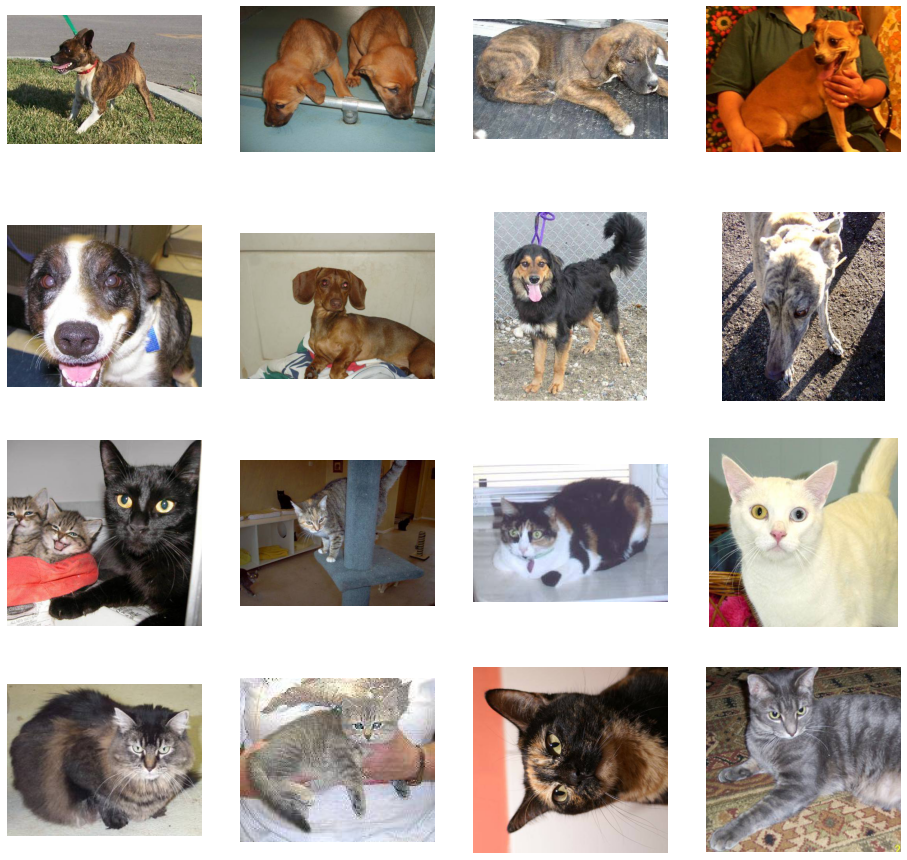

In [22]:
f=plt.gcf()
f.set_size_inches(c*4,r*4)

z+=8

ncp=[os.path.join(tc,f) for f in tcn[z-8:z]]
ndp=[os.path.join(td,f) for f in tdn[z-8:z]]

for i,im in enumerate(ndp+ncp):
  s=plt.subplot(r,c,i+1)
  s.axis('Off')

  img=mim.imread(im)
  plt.imshow(img)

In [25]:
import tensorflow as tf
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [26]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

m=ImageDataGenerator(rescale=1.0/255.0)

tg=m.flow_from_directory(t,
                         batch_size=20,
                         class_mode='binary',
                         target_size=(150,150))

vg=m.flow_from_directory(v,
                         batch_size=20,
                         class_mode='binary',
                         target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
hist=model.fit(tg,
               steps_per_epoch=100,
               epochs=15,
               validation_data=vg,
               validation_steps=50,
               verbose=2
               )

Epoch 1/15
100/100 - 65s - loss: 0.8826 - accuracy: 0.5440 - val_loss: 0.9030 - val_accuracy: 0.5000 - 65s/epoch - 650ms/step
Epoch 2/15
100/100 - 71s - loss: 0.6592 - accuracy: 0.6480 - val_loss: 0.5791 - val_accuracy: 0.7150 - 71s/epoch - 711ms/step
Epoch 3/15
100/100 - 83s - loss: 0.5544 - accuracy: 0.7085 - val_loss: 0.5770 - val_accuracy: 0.7010 - 83s/epoch - 828ms/step
Epoch 4/15
100/100 - 74s - loss: 0.4837 - accuracy: 0.7655 - val_loss: 0.7241 - val_accuracy: 0.6270 - 74s/epoch - 737ms/step
Epoch 5/15
100/100 - 65s - loss: 0.4056 - accuracy: 0.8095 - val_loss: 0.6007 - val_accuracy: 0.7310 - 65s/epoch - 648ms/step
Epoch 6/15
100/100 - 61s - loss: 0.3303 - accuracy: 0.8515 - val_loss: 0.6732 - val_accuracy: 0.6990 - 61s/epoch - 615ms/step
Epoch 7/15
100/100 - 62s - loss: 0.2491 - accuracy: 0.8885 - val_loss: 0.7014 - val_accuracy: 0.7230 - 62s/epoch - 623ms/step
Epoch 8/15
100/100 - 79s - loss: 0.1953 - accuracy: 0.9225 - val_loss: 0.8384 - val_accuracy: 0.7290 - 79s/epoch - 793

Upload Image here:

In [31]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

u=files.upload()

for fn in u.keys():
  p='/content/'+fn
  img=image.load_img(p,target_size=(150,150))
  x=image.img_to_array(img)
  x/=255
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


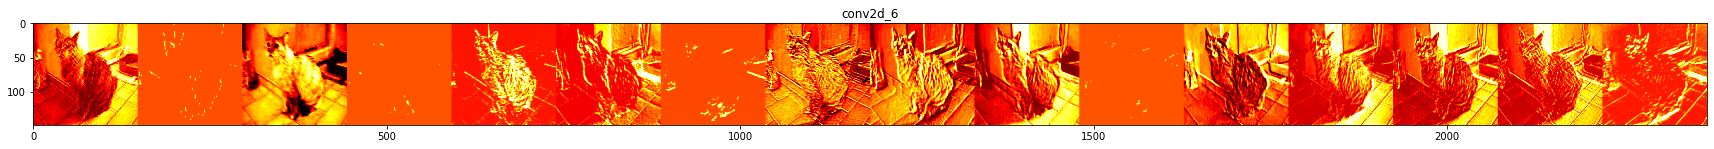

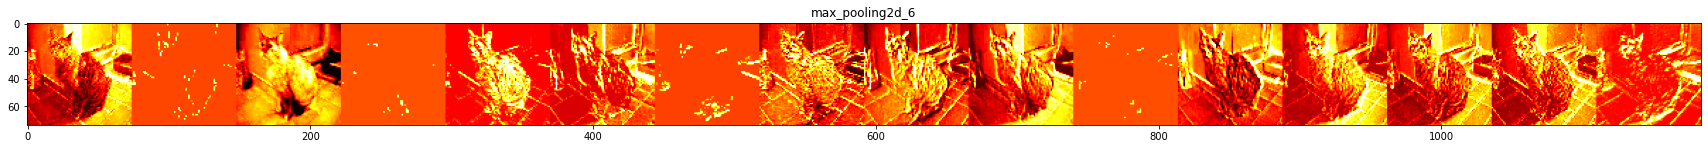

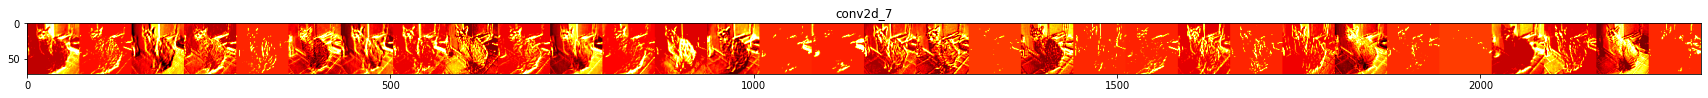

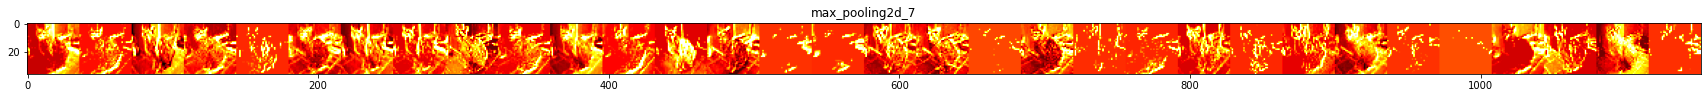

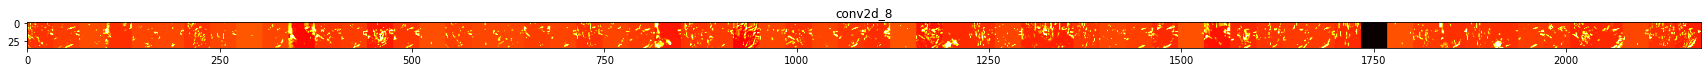

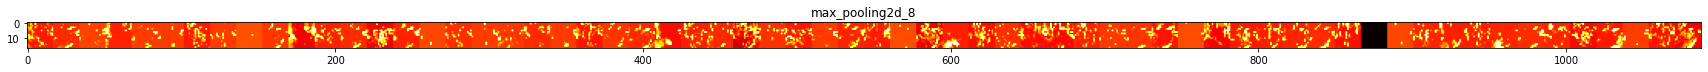

In [45]:
import random

so=[layer.output for layer in model.layers]
vm=tf.keras.models.Model(inputs=model.input,outputs=so)

ci=[os.path.join(tc,f) for f in tcn]
di=[os.path.join(td,f) for f in tdn]
ip=random.choice(ci+di)

img=image.load_img(ip,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
x/=255.0

sfm=vm.predict(x)
lns=[layer.name for layer in model.layers]

for ln,fm in zip(lns,sfm):
  if len(fm.shape)==4:
    nf=fm.shape[-1]
    s=fm.shape[1]

    dg=np.zeros((s,s*nf))
    for i in range(nf):
      x=fm[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64
      x+=128
      x=np.clip(x,0,255).astype('uint8')
      dg[:,i*s:(i+1)*s]=x

    sc=30.0/nf
    plt.figure(figsize=(sc*nf,sc))
    plt.title(ln)
    plt.grid(False)
    plt.imshow(dg,aspect='auto',cmap='hot')
      